# **INTRODUCCIÓN**

En el siguiente estudio de **ChIP-seq**, se aplica un tipo de lenguaje informático conocido como ***bash scripting*** y técnicas bioinformáticas basadas en ChIP-seq usando herramientas como son ***HOMER*** conjuntamente con análisis en **R**. Todo de manera automatizada. Este estudio está basado en muestras obtenidas en el estudio [Hu Y, Zhou L, Huang M, He X et al. Gibberellins play an essential role in late embryogenesis of Arabidopsis. Nat Plants 2018 May;4(5):289-298. PMID: 29725104](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE115358)

*Arabidopsis thaliana* cuando está etiolada, abre sus cotiledones y detiene la rápida elongación del hipocotilo cuando se expone a la luz (*desetiolación*). Se identificaron los componentes principales sensibles a la luz en dicho proceso y se han vislumbrado las vías de señalización. Sin embargo, todavía se desconoce como se logran las respuestas específicas en presencia de luz de cada órgano. 
Se encontró un regulador de desarrollo ***TCP4*** *TEOSINTE BRANCHED1, CYCLOIDEA* Y *PCF* que participa en la fotomorfogénesis y facilita la apertura del cotiledón inducida por la luz. Se demuestra que los factores transcripcionales similares a TCP4 que se expresan de forma predominante en cotiledones de plántulas claras y oscuras activan SAUR16 y SAUR50 en respuesta a la luz. 

# **OBJETIVO**

Mediante la aplicación de ChIP-seq y la **secuenciación de altas prestaciones** analizamos los *chip* e *input* obtenidos para ver la interacción entre los factores de respuesta a luz y la correspondiente regulación de la expresión génica dependiente de la señal lumínica. Mediante el *path-line*, desarrollado en la tarea 1.
A continuación, se analizaran:

1. Los archivos fast.qc en los cuales se comprobará la calidad de las muestras del estudio.
2. Se mostrará una visualización de narrow.peaks obtenidos en el programa [IGV](http://software.broadinstitute.org/software/igv/)
3. Además,se mostrarán los resultados del análisis [HOMER](http://homer.ucsd.edu/homer/), así como, el correspondiente análisis de [RStudio](https://rstudio.com/)

# ANÁLISIS ChIP-seq

## Análisis de la Calidad 

El primer paso a realizar en ChIP-seq es el análisis de la calidad de los datos correspondiente a cada muestra.

### INPUT 

Link al html: [INPUT_COL](./col-input.html) [INPUT_TCP4](./mTCP4-input.html)

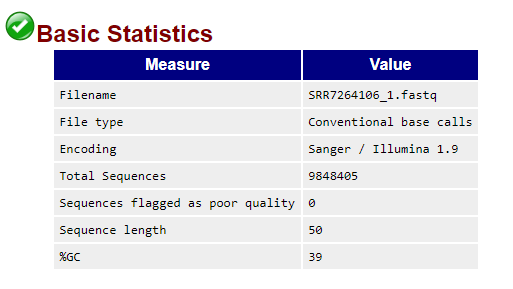

   *Figura 1. Estadística de la muestra input.*

Podemos ver que la secuenciación se ha hecho mediante la técnica Illumina 1.9 y Sanger. El total de secuencias es de 9.848.405 y que apenas se han detectado secuencias de poca calidad. El contenido en **%GC** es del 39%. 

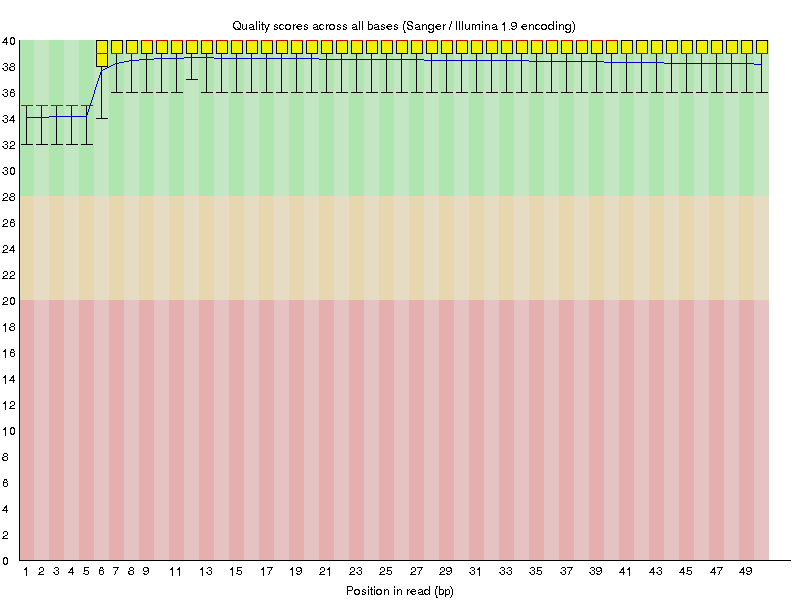

*Figura 2. Calidad de la muestra por pares de bases*

Para el input observamos como los boxplots correspondientes aparecen en la franja verde. Esto nos indica que el resultado de calidad por pares de bases de toda la muestra es bastante buena. De manera que no obtenemos ningún par de bases que nos cause problema en este análisis. Sin embargo, si podemos observar como los pares de bases del inicio tiene una puntuación más baja. Aun así, todos están dentro del rago permitido.

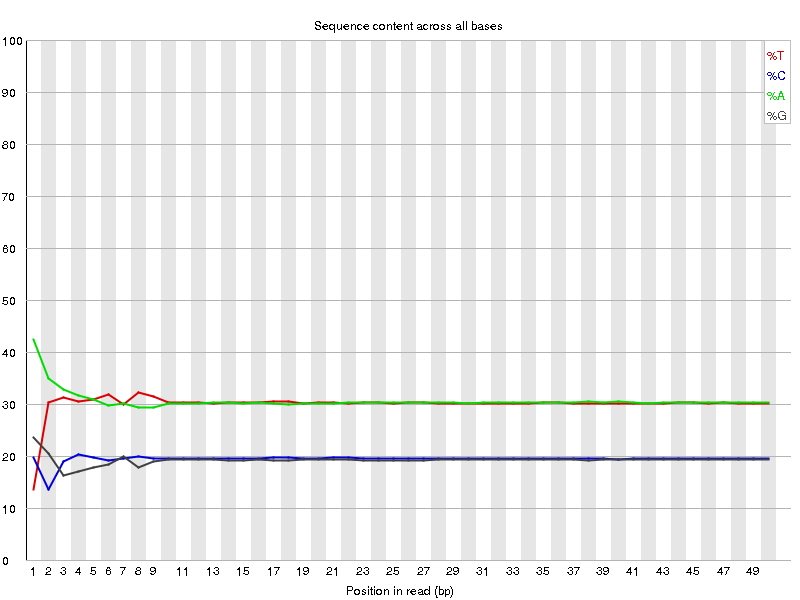

*Figura 3. Contenido en %GC y %AT*

Es de esperar que el contenido en A-T sea siempre mayor que el contenido en G-C, ya que es típico de *Arabidopsis Thaliana*, el organismo modelo usado en nuestro estudio. Deducimos que el input posee correctamente el porcentaje esperado, y que por tanto esta no está contaminado, que es un error frecuente. Por otro lado, es de especial interés que en la mayoría de casos, al principio de la secuencia se obtenga una alteración de estos porcentajes, donde aparece un contenido en **%GC** mayor que en **%AT**. Esto se debe a que al realizar la secuencia se pegan unos adaptadores en los extremos, y al quitarlos a veces hay problemas sobre todo en el extremo 5’. En el extremo 3’ estos se quitan con facilidad y es por ello que no aparece esta alteración. En nuestro caso no ocurre de manera destacable. 

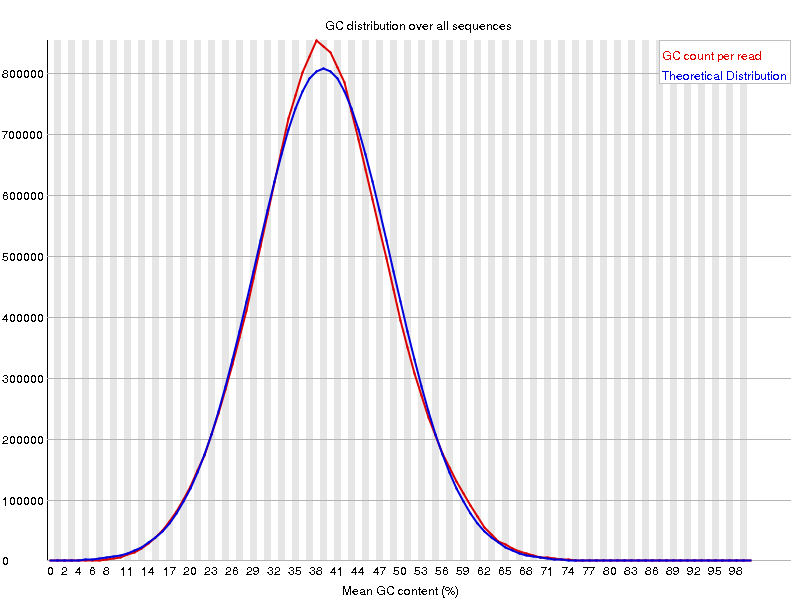

*Figura 4. Contenido en G+C por secuencia.*

### CHIP

Los resultados obtenidos fueron exactamente idénticos a los obtenidos en el input. Tal y como se muestra en:

[CHIP_COL](./col.html) [CHIP_TCP4](./mTCP4.html)



### Mapeo de lecturas cortas al genoma de referencia

Una vez realizado el análisis de la calidad, procedemos a comparar genoma contra genoma, tal y como se requiere en un estudio de ChIP-seq. Para ello se usa la función **bowtie2** y se generan los *genome index* que se guardan en formato .SAM y que se van a pasar a formato .BAM para su posterior análisis. 

Se generan los picos con la función **macs2 callpeak**. Se generan los ficheros *narrowPeak* de ambas muestras, tanto input como el chip. Posteriormente se usará un script para determinar los genes dianas del factor de transcripción. La función **macs2** se usa para extraer los picos.

Archivos narrow.Peak:
[narrow.Peak_control](./callpeakcol_peaks.narrowPeak)
[narrow.Peak_mTCP4](./callpeakmTCP4_peaks.narrowPeak)

# VISUALIZACIÓN IGV 

Una vez obtenidos los ficheros *narrowPeak* de cada muestra, se visualizan con la herramienta **IGV** para comprobar que efectivamente los genes que buscamos en igv son picos. Para ello se utilizan los archivos .BAM de ambas muestras. 

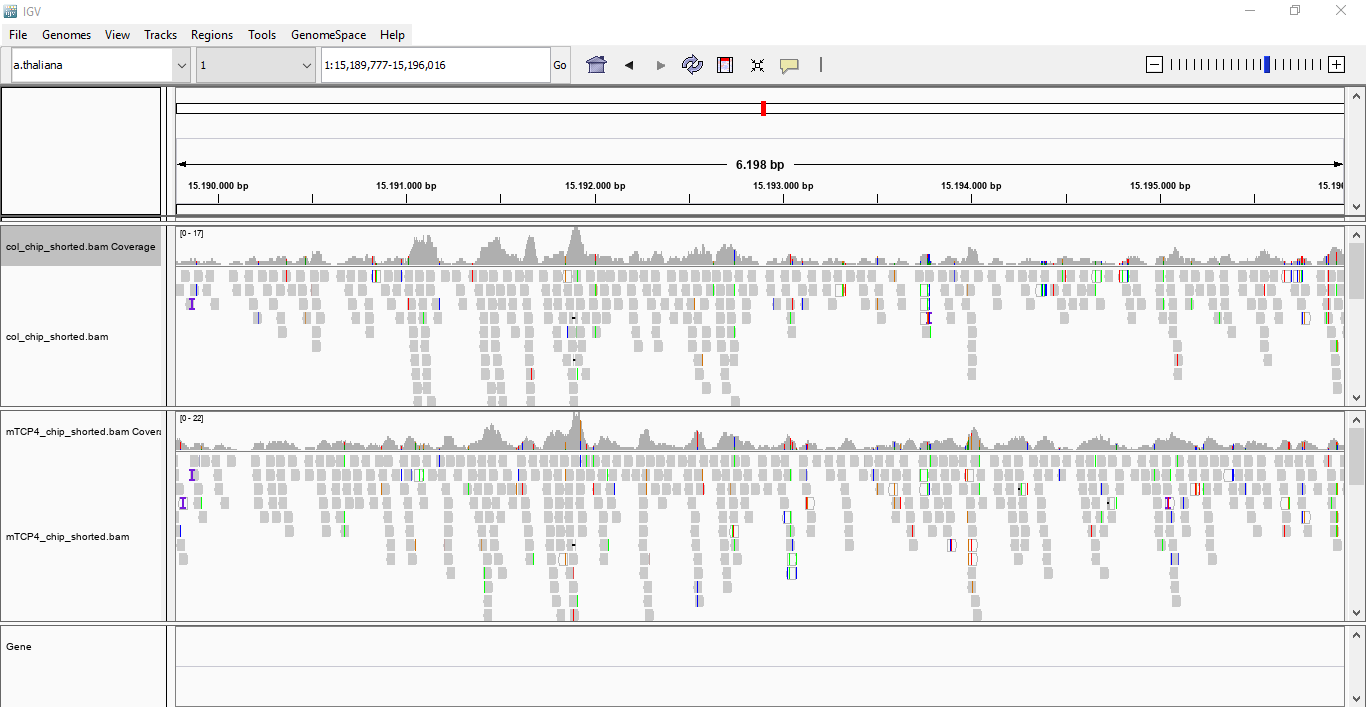

*Figura 5. Visualización en **IGV** de los archivos .BAM obtenidos mediante el bash script descrito anteriormente para el caso del cromosoma 1 del genoma de A.thaliana.*

A continuación, se procede a visualizar algunos genes que se expresan de forma diferencial obtenidos a partir del análisis en RStudio que se explicará posteriormente en otro apartado. 

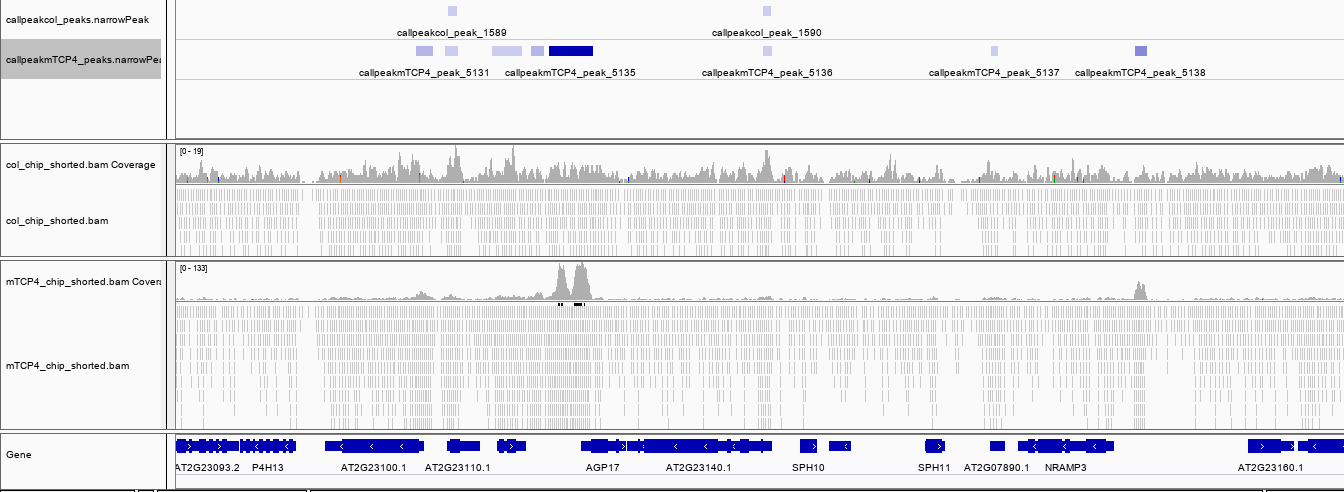

*Figura 6. Comparación de los archivos **narrowPeak** obtenidos junto con los ficheros .BAM y picos obtenidos.*

Como podemos observar en la **figura 6** hay picos claros que aparecen tanto en el control como en el tratamiento y, por lo tanto, no son significativos ya que el input corresponde con el ruido de fondo. Sin embargo, hay picos que aparecen en el chip o tratamiento como en el caso del gen **AT2G23140.1**, **AT2G07890.1** y **AT2G23180.1** que vemos en la figura 13 y que efectivamente se corresponden con picos. 

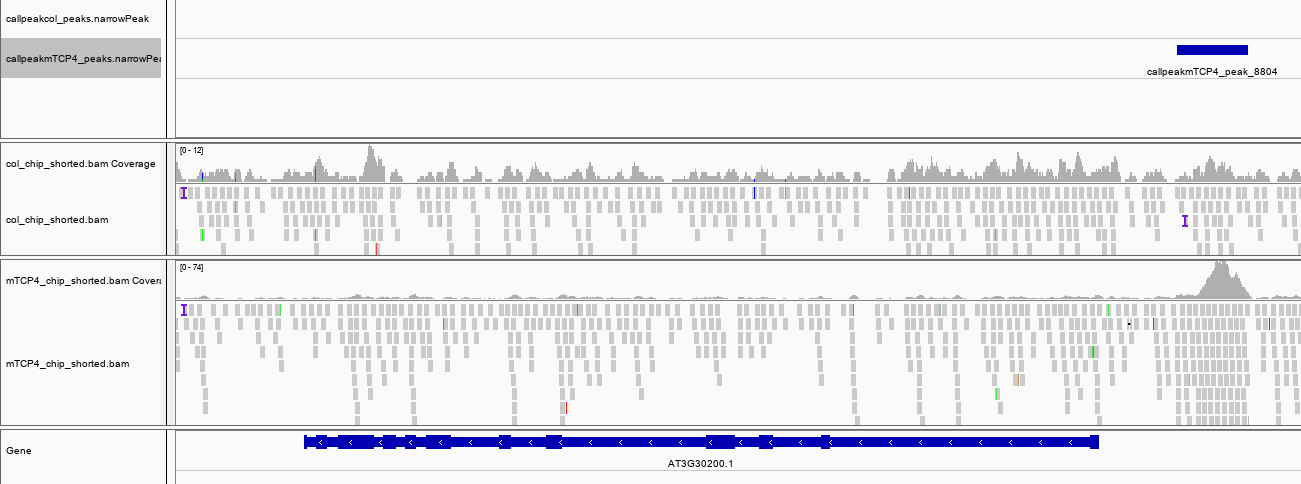

*Figura 7. Comparación de los archivos narrowPeak obtenidos junto con los ficheros .BAM y picos obtenidos.*

Así observamos también picos significativos para el caso del gen **AT3G30200.1** en el cromosoma 3 de *Arabidopsis thaliana*.

# HOMER 

Los resultados obtenidos mediante el análisis **HOMER** son los siguientes: 

1. [control](./control.html)
2. [control2](./controll.html)
3. [mTCP4](./homerResults.html)
4. [mTCP4_2](./knownResults.html)

Los html adjuntos muestran los motivos existentes tanto en el control como en el tratamiento además del nombre del gen al que corresponden, resultados de la ontología de genes y un archivo txt con los resultados obtenidos de los motivos conocidos. 

Ahora bien, en el análisis de HOMER, en general, encontramos motivos pertenecientes a genes como son **FHY3 y FAR1**, que participan en procesos de regulación del equilibrio entre las respuestas de crecimiento y defensa en condiciones de sombra. También encontramos repeticiones GAGA. Se sabe que están involucradas en el mecanismo de *PRC*, un complejo represivo presente en *A.thaliana* y que participa en procesos de expresión de genes. Con lo cual, encontramos genes y motivos involucrados que están directamente relacionados con el factor de transcripción que se analiza en este estudio, ya que participan en procesos de fotomorfogénesis y desarrollo de la planta. 


# ANÁLISIS DE RSTUDIO

## Genes expresados de forma diferencial

A partir del siguiente script [RScript](./RScript.r) y los ficheros *narrowPeak* obtenidos [narrowPeak_col](./callpeakcol_peaks.narrowPeak), [narrowPeak_TCP4](./callpeakmTCP4_peaks.narrowPeak), se van a determinar los genes diana de un factor de transcripción mediante el uso de la función **macs2**.

In [ ]:
library("clusterProfiler")

library("org.At.tair.db")

library("topGO")

library("pathview")

library("ChIPseeker")

library(TxDb.Athaliana.BioMart.plantsmart28)
txdb <- TxDb.Athaliana.BioMart.plantsmart28

Los paquetes usados se pueden encontrar en [Bioconductor](http://www.bioconductor.org/)

In [ ]:
peak.col<- "callpeakcol_peaks.narrowPeak"
peak.treat<- "callpeakmTCP4_peaks.narrowPeak"

A continuación, se procede a leer el fichero de picos, al que se le llama *col.peaks* y se define la longitud de los promotores que nosotros estableceremos entre 1000 aguas arriba y 1000 aguas abajo. En segundo lugar, se procede a la anotación de los picos.

In [ ]:
## Leer fichero de picos
col.peaks <- readPeakFile(peakfile = peak.col, header=FALSE)
col.peaks

treat.peaks <- readPeakFile(peakfile = peak.treat, header=FALSE)
treat.peaks

## Definir la región que se considera promotor entorno al TSS
promoter <- getPromoters(TxDb=txdb, 
                         upstream=1000, 
                         downstream=1000)
promoter

## Anotación de los picos
col.peak.annot<- annotatePeak(peak = col.peaks, 
                             tssRegion=c(-1000, 1000),
                             TxDb=txdb)
col.peak.annot

treat.peak.annot<- annotatePeak(peak = treat.peaks, 
                              tssRegion=c(-1000, 1000),
                              TxDb=txdb)
treat.peak.annot

In [ ]:
## Crear un plot con el porcentaje de la naturaleza de los picos dentro del DNA
## % de exones, promotores etc.

plotAnnoPie(col.peak.annot)
plotDistToTSS(col.peak.annot,
              title="Distribution of genomic loci relative to TSS",
              ylab = "Genomic Loci (%) (5' -> 3')")

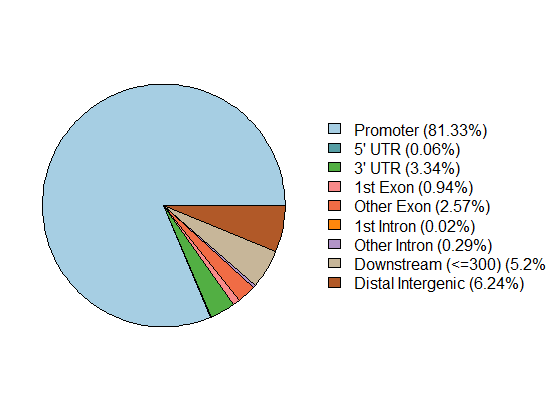

*Figura 8. Porcentaje de los picos presentes en el ADN, % de regiones UTR, % de exones, intrones etc... en el control*

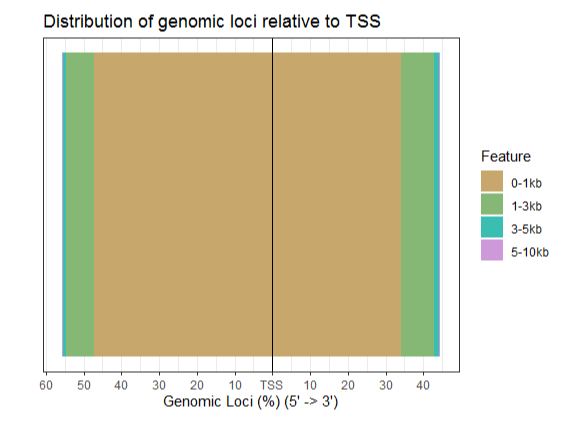

*Figura 9. Distribución de los ***transcription start sites*** dentro del genoma de la muestra control*

In [ ]:
plotAnnoPie(treat.peak.annot)
plotDistToTSS(treat.peak.annot,
              title="Distribution of genomic loci relative to TSS",
              ylab = "Genomic Loci (%) (5' -> 3')")

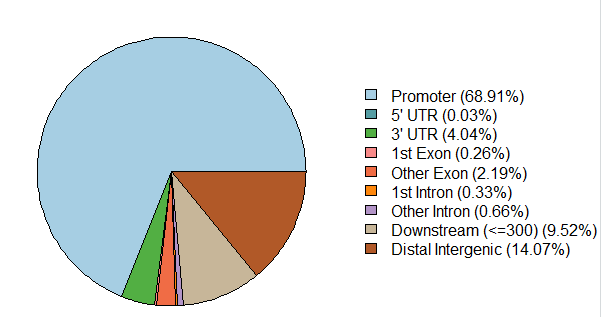

*Figura 10. Porcentaje de los picos presentes en el ADN, % de regiones UTR, % de exones, intrones etc... en el tratamiento.*

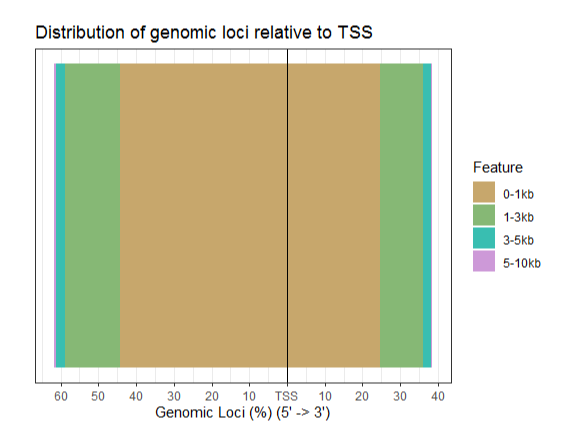

*Figura 11. Distribución de los TSS dentro del genoma del tratamiento.*

Como podemos observar, el porcentaje de promotores en el control es de un 81.33%. A su vez, observamos que hay un 68.91% de promotores dentro del ADN del tratamiento, mucho menor a lo que encontramos en el control. 
También observamos que la distribución de los loci relativizada a la posición de los TSS (transcription starting site) es diferente en ambos casos.

Este primer análisis se ha realizado mediante el paquete de ***ChIPSeeker*** que implementa funciones para recuperar los genes más cercanos alrededor del pico, anotaciones de la región genómica del pico, métodos estadísticos y proporciona datos útiles para poder comparar con bases de datos y así generar hipótesis. 

In [ ]:
## Convertir la anotación a data frame
control.annotation <- as.data.frame(col.peak.annot)
head(control.annotation)

target.genes.control <- unique(control.annotation$geneId[control.annotation$annotation == "Promoter"])
length(target.genes.control)

write(x = target.genes.control ,file = "target_genes_control.txt")


treat.annotation <- as.data.frame(treat.peak.annot)
head(treat.annotation)

target.genes.treat <- unique(treat.annotation$geneId[treat.annotation$annotation == "Promoter"])
length(target.genes.treat)


write(x = target.genes.treat ,file = "target_genes_treat.txt")

Posteriormente, se genera un archivo *data frame* que no es más que una estructura de datos rectangular, que contiene las variables en las columnas y las observaciones en las filas. Todo esto se guarda en el archivo [target_genes_control.txt](./target_genes_control.txt) y [target_genes_treat.txt](./target_genes_treat.txt) . Esto lo hacemos para calcular los genes expresados diferencialmente.

In [ ]:
#### Cáculo de los genes diferenciales entre el control y el tratamiento
target.genes<-setdiff(target.genes.treat,target.genes.control)

length(target.genes)

write(x = target.genes ,file = "target.genes.txt")


Los genes expresados diferencialmente son: [target.genes](./target.genes.txt)

## Análisis GEO

GEO sirve para analizar y visualizar perfiles genéticos funcionales. 

Este análisis lo realizamos haciendo uso del paquete de R **clusterProfiler**. Antes de realizar el análisis determinamos el universo ***background*** de los genes que vamos a analizar:

In [ ]:
# Necesitaremos el universo del cual realizaremos los enriquecimientos

ath.genes<-as.data.frame(genes(txdb))
ath.genes<- ath.genes$gene_id

En primer lugar necesitamos descargar el archivo *org.At.tair.db* porque nos va a servir para definir el keytype. La variable ont indica el tipo de análisis de enriquecimiento que se realiza habiendo tres tipos: 

1. "BP" que hace referencia a procesos biológicos (*biological process*)
2. "MF" funciones moleculares (*molecular function*)
3. "CC" compartimentos celulares (*celular compartiment*)


In [ ]:
idType(OrgDb = org.At.tair.db)

e.bp<- enrichGO(gene = target.genes,
             OrgDb = org.At.tair.db,
             keyType = "TAIR",
             ont = "BP",
             pvalueCutoff = 0.05,
             qvalueCutoff = 0.05,
             universe = ath.genes)

head(e.bp)

In [ ]:
jpeg(filename = "plot_e_bp.jpeg")
plot.e.cc<- plotGOgraph(x = e.bp,
                         firstSigNodes = 10,
                         useInfo = "all",
                         sigForAll = TRUE,
                         useFullNames = TRUE)
dev.off()


No se ha añadido esta imagen al estudio debido a su baja resolución.

In [ ]:
e.bp.table <- as.data.frame(e.bp)

head(e.bp.table)

barplot(e.bp, showCategory=20)

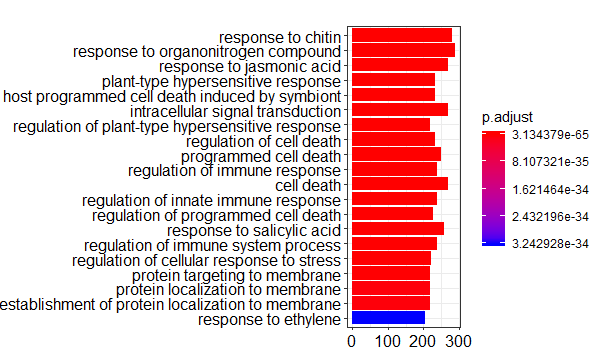

*Figura 12. Barplot, procesos biológicos*.

##### Observaciones: 

Si observamos el barplot, vemos que son procesos de respuesta a quitina, componentes nitrogenados, respuesta hipersensible, procesos de muerte celular... Es decir, vemos que realmente en el tratamiento se activan genes involucrados en procesos de respuesta a determinados factores o estímulos de forma diferencial que no se limitan a procesos biológicos que hacen referencia al metabolismo normal del organismo. 

In [ ]:
e.mf<- enrichGO(gene = target.genes,
                OrgDb = org.At.tair.db,
                keyType = "TAIR",
                ont = "MF",
                pvalueCutoff = 0.05,
                qvalueCutoff = 0.05,
                universe = ath.genes)

head(e.mf)

e.mf.table <- as.data.frame(e.mf)

barplot(e.mf, showCategory=20)

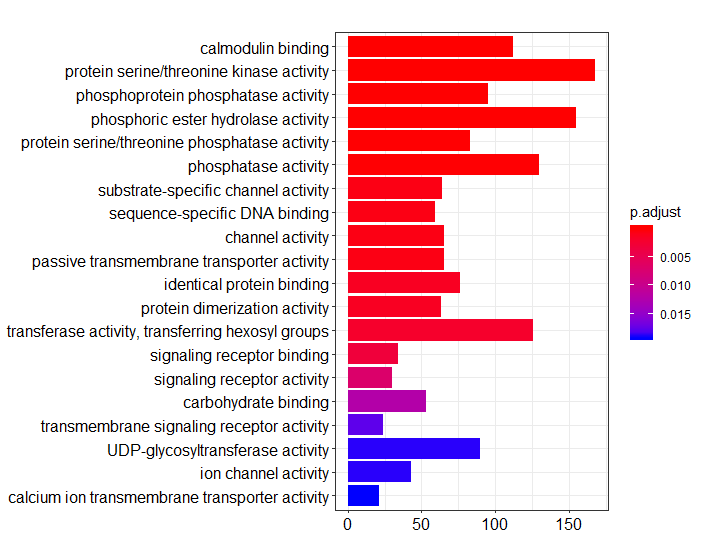

*Figura 13. Barplot, funciones moleculares*.

##### Observaciones:

Para el caso de genes implicados en las funciones moleculares encontramos que están relacionadas con el ADN celular pero implicadas en otras funciones encaminadas a la respuesta celular. Esto concuerda con lo obtenido anteriormente en el apartado de procesos biológicos.

In [ ]:
e.cc<- enrichGO(gene = target.genes,
                OrgDb = org.At.tair.db,
                keyType = "TAIR",
                ont = "CC",
                pvalueCutoff = 0.05,
                qvalueCutoff = 0.05,
                universe = ath.genes)

head(e.cc)

e.cc.table <- as.data.frame(e.cc)

head(e.cc.table)

barplot(e.cc, showCategory=20)

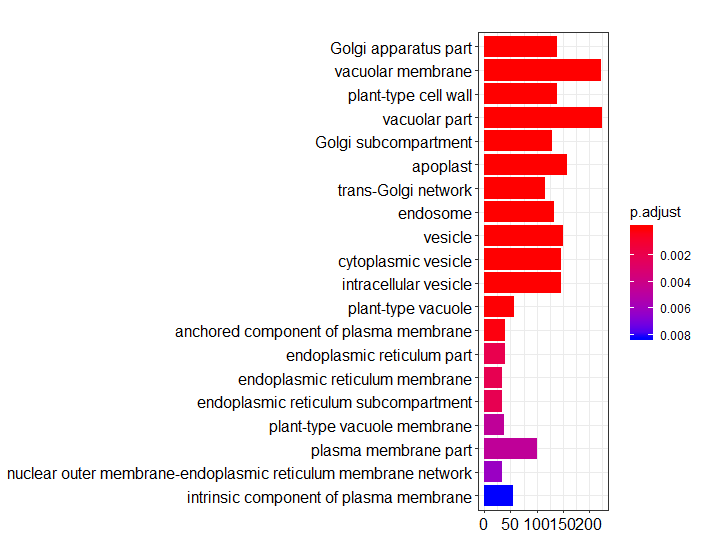

*Figrua 14. Barplot, compartimentos celulares*.

##### Observaciones: 

Están involucrados compartimentos celulares como son el aparato de Golgi que es necesario a la hora del transporte de proteínas y factores en respuesta a determinados estímulos o procesos, el apoplasto, vesículas, etc.. Es decir, nos da una idea de que se están produciendo respuestas a determinados estímulos y que la célula está actuando frente a ellos a través de su metabolismo.

## Análisis KEGG

Vamos a usar **KEGG** para este análisis.KEGG (Kyoto Encyclopedia of Genes and Genomes) es una colección de bases de datos en línea de genomas, rutas enzimáticas, y químicos biológicos. La base de datos PATHWAY, que también vamos a utilizar, registra redes de interacciones moleculares en el interior de las células, y variantes de ellas específicas de determinados organismos. 

In [ ]:
e.kegg<- enrichKEGG(gene = target.genes, 
                    organism = "ath", 
                    universe = ath.genes)

e.kegg.table <- as.data.frame(e.kegg)


head(e.kegg.table)

Kegg.ID<-e.kegg.table$ID

Obtenemos los genes más significativos del enriquecimiento y a continuación vamos a observar la función que ejercen y las rutas en las que están implicados. 

In [ ]:
for(i in 1:length(Kegg.ID))
{
  kegg.pathview<- pathview(gene.data = ath.genes, 
                           pathway.id = Kegg.ID[i] ,
                           species = "ath",
                           gene.idtype = "TAIR")
  
}

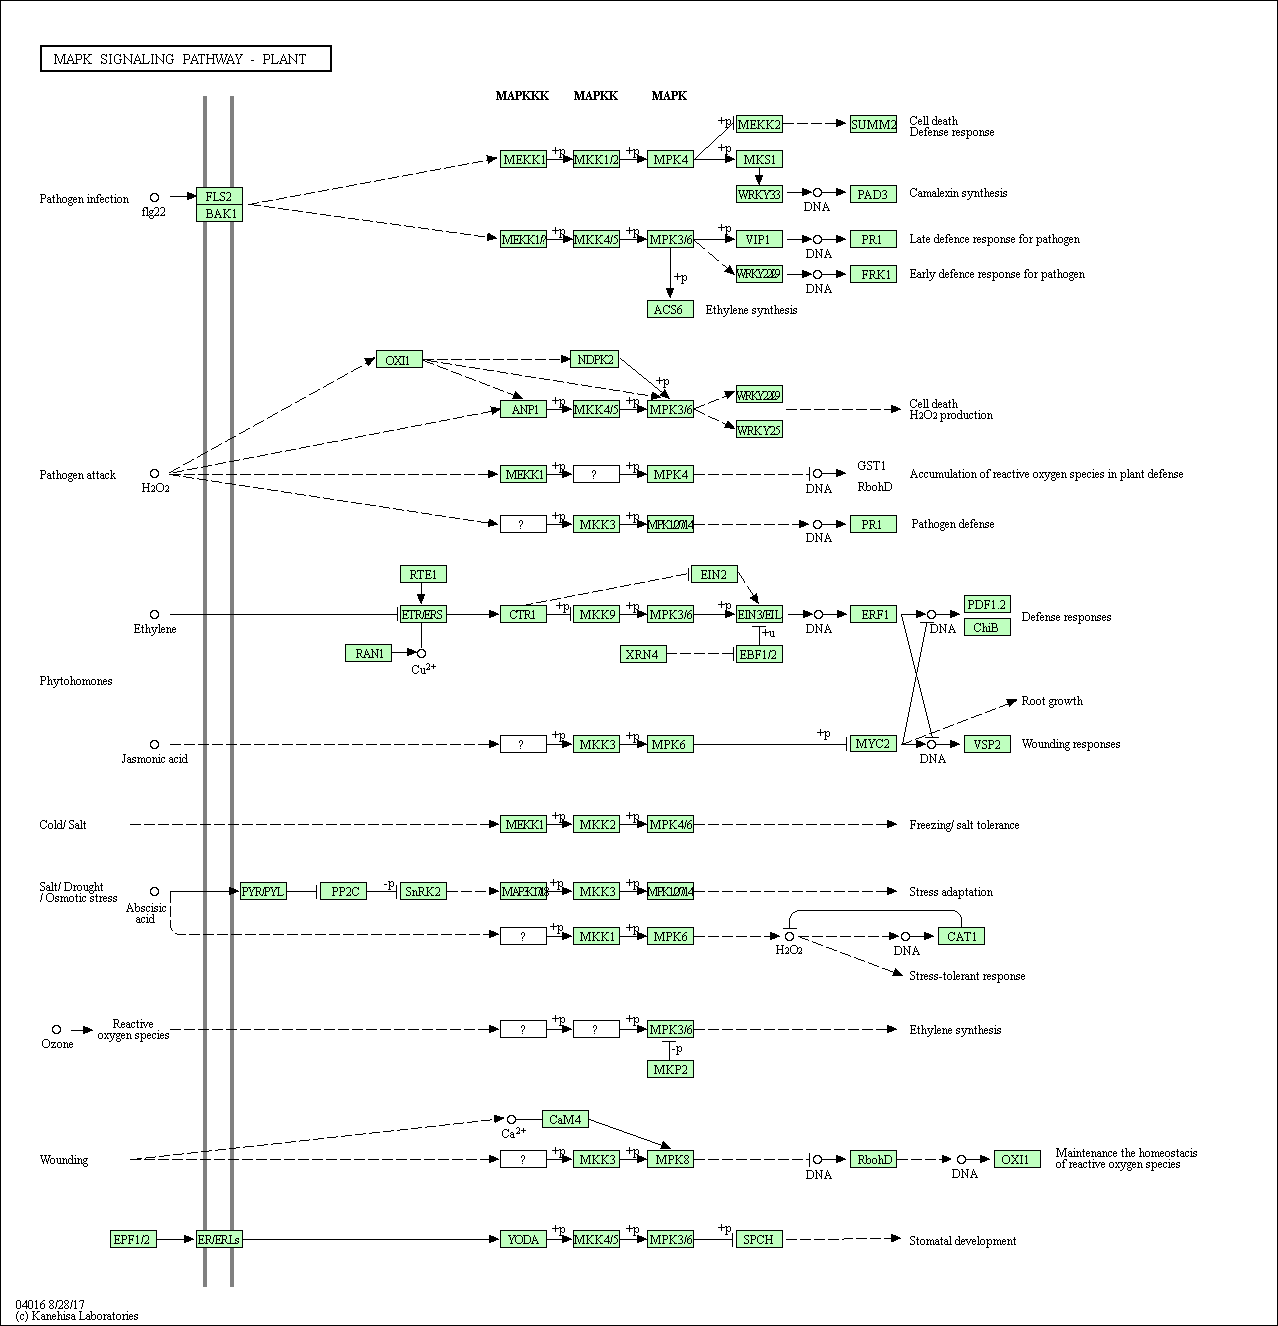

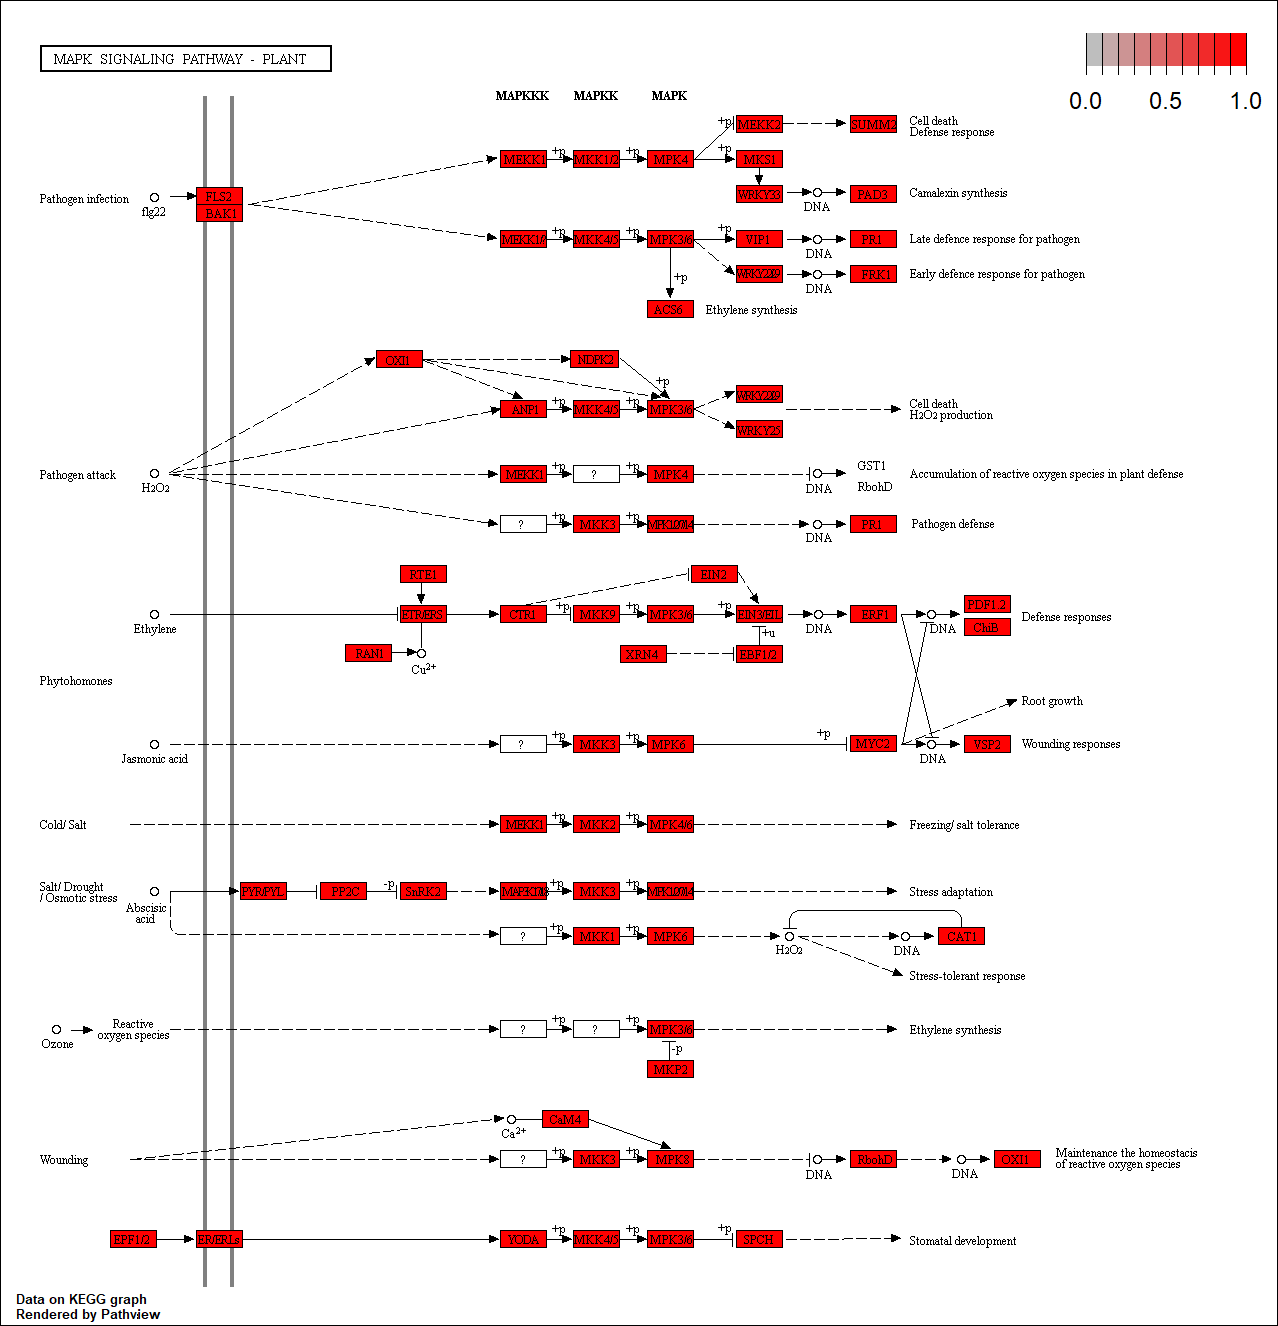

*Figuras 15,16. Mapa metabólico de la acción de las MAPkinasas en la planta y a continuación (segunda imagen), en rojo, aquellas que se expresan más activamente para el caso del gen ath04016*

##### Observaciones:
Como podemos observar, en la ruta de activación de las MAPK están implicadas la mayoría (señaladas en rojo) y atienden a procesos de estrés salino, fitohormonas, ataques de patógenos, infección, heridas, etc...

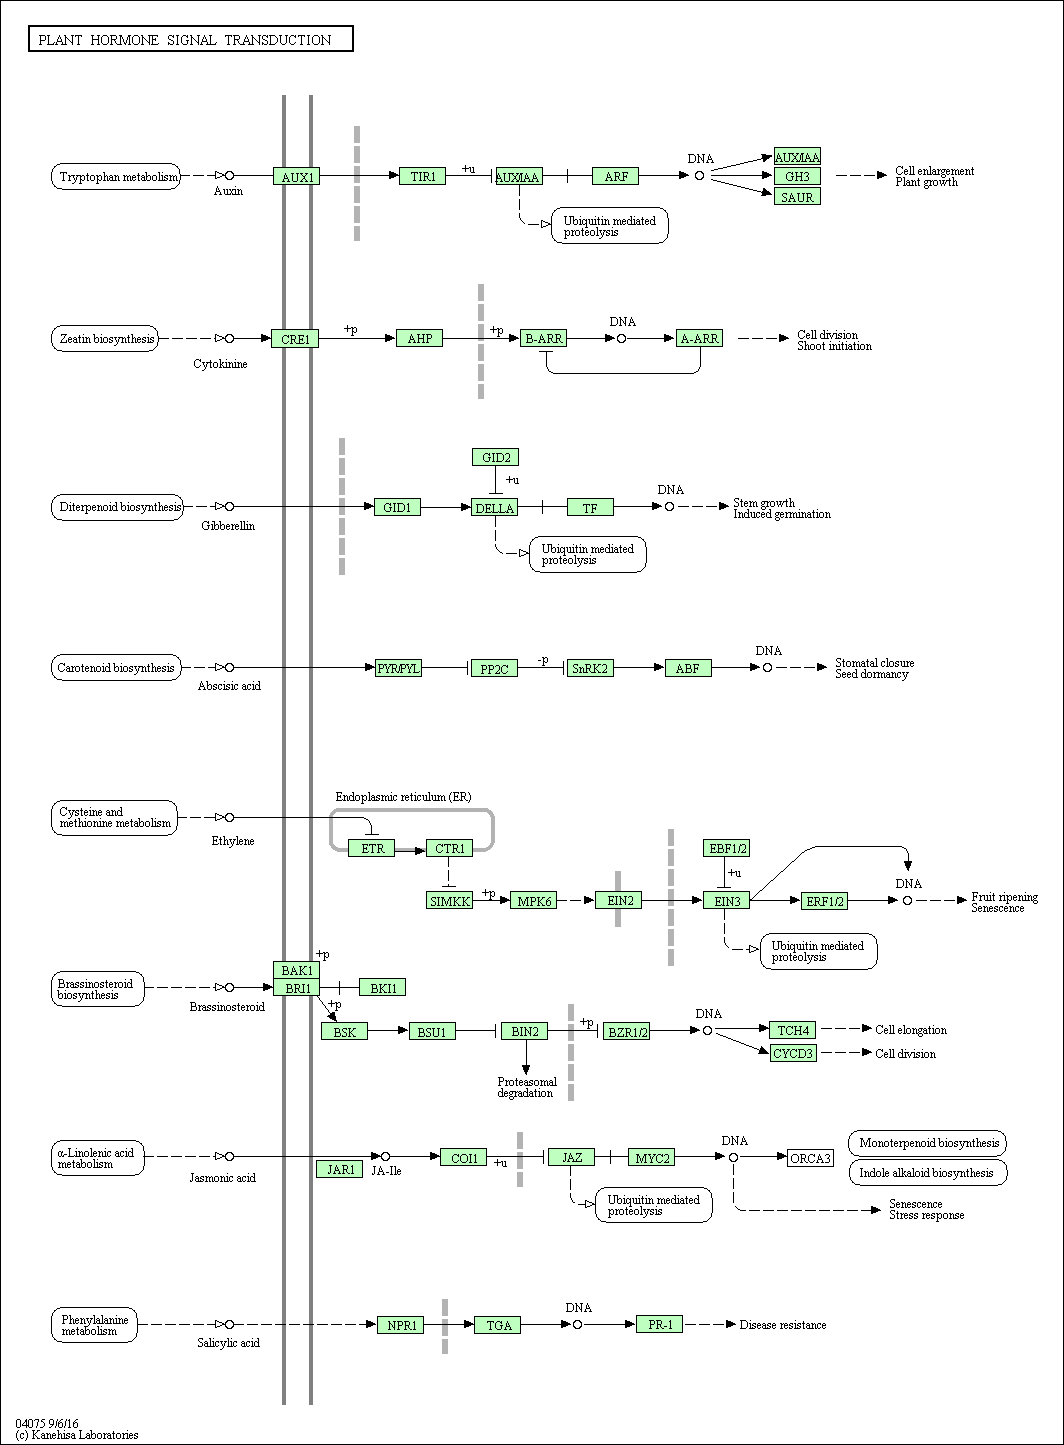

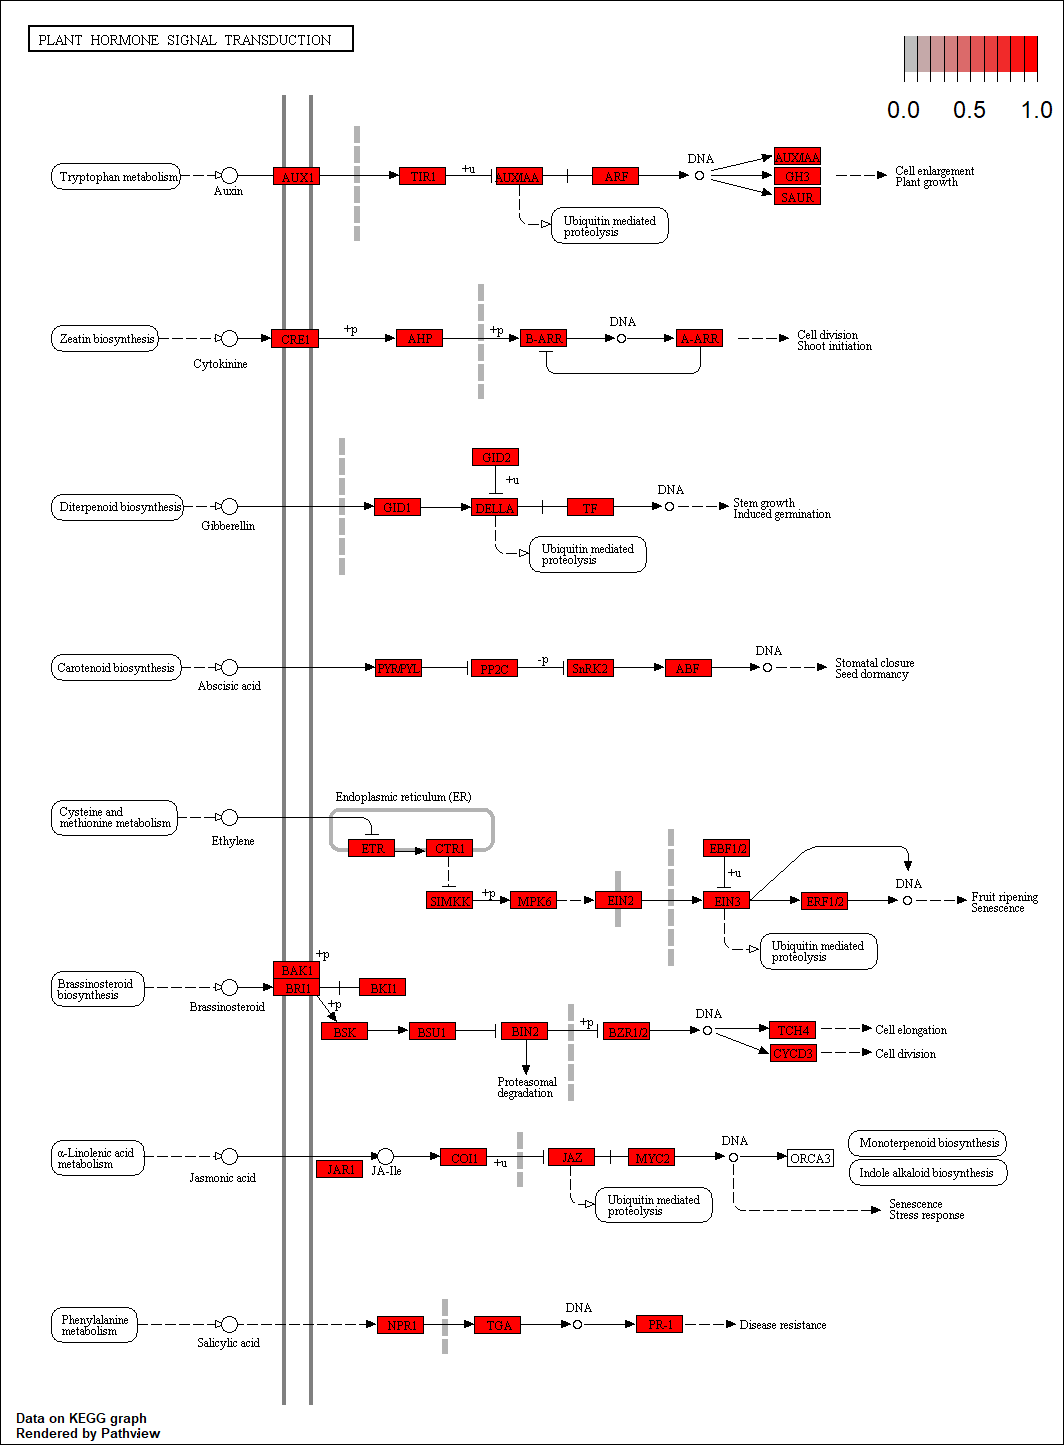

*Figuras 17,18. Mapa metabólico de la síntesis de hormonas en la planta y a continuación (segunda imagen), en rojo, aquellas que se expresan más activamente para el caso del gen ath04075.*

##### Observaciones:
Para el caso de las figuras 17,18, los genes expresados son aquellos implicados en la respuesta a hormonas como son las giberelinas, ácido linolénico, metabolismo del triptófano, metabolismo de la fenilalanina... Procesos metabólicos que ocurren en la planta en respuesta a determinados estímulos. 

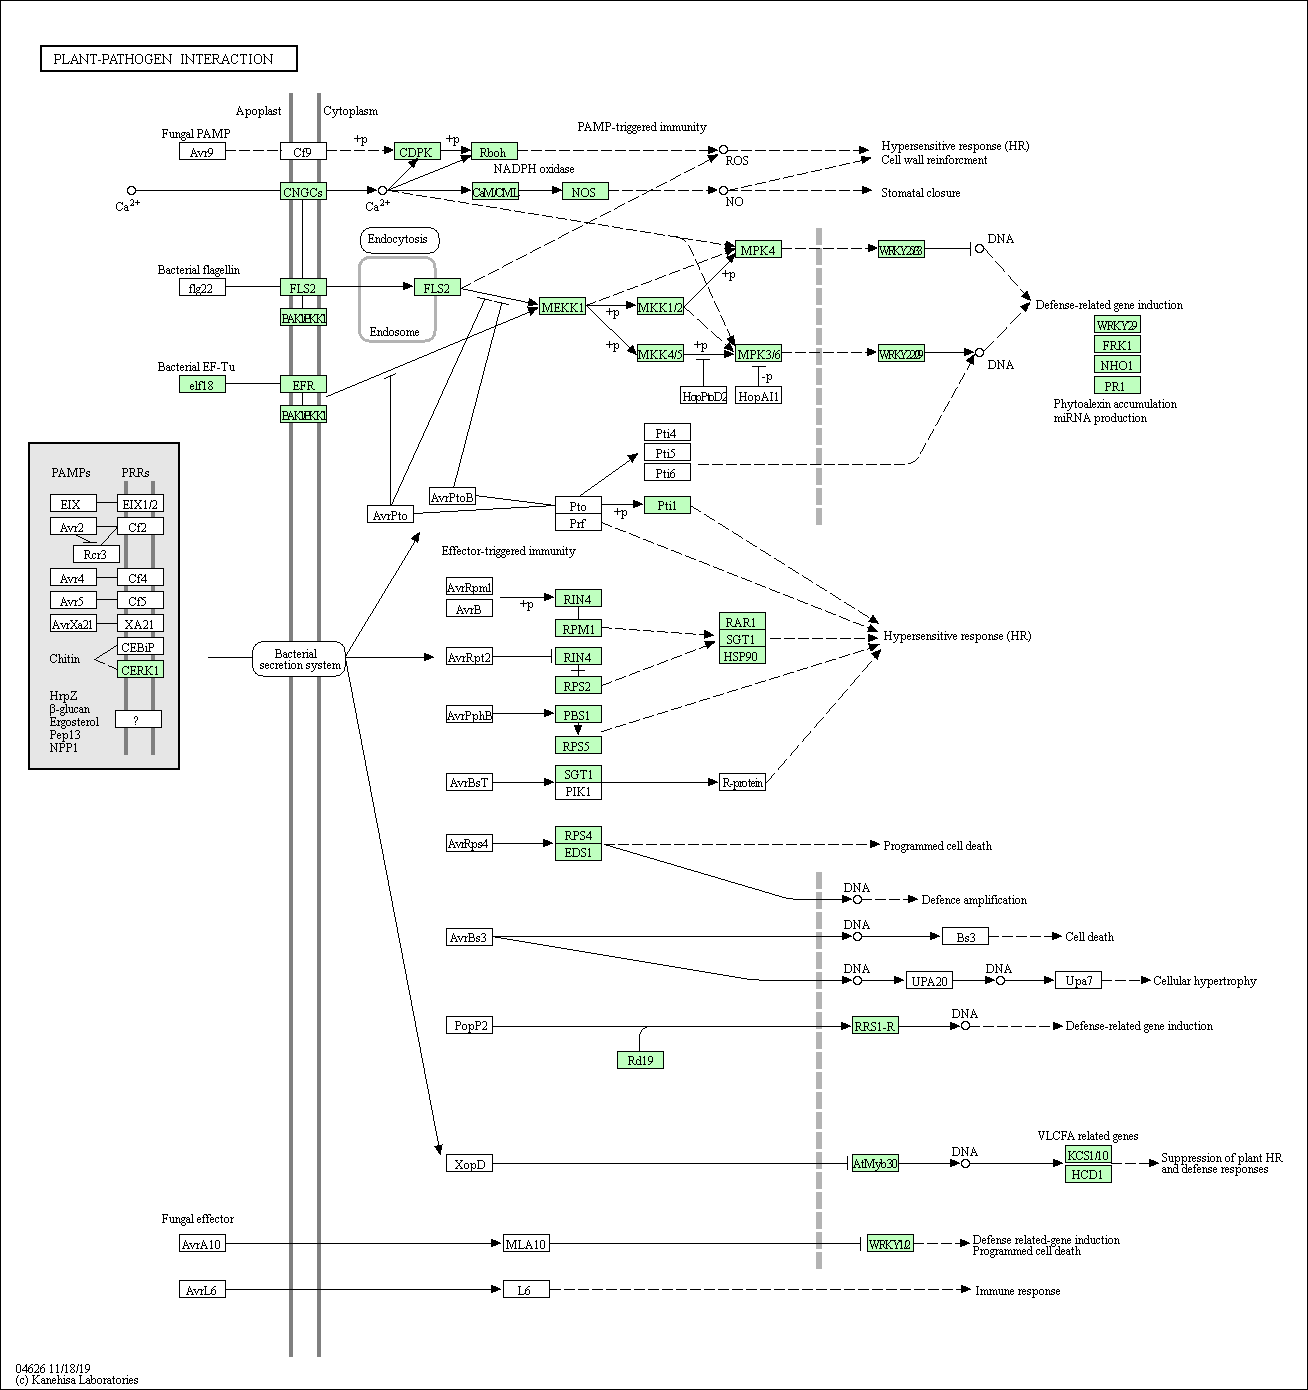

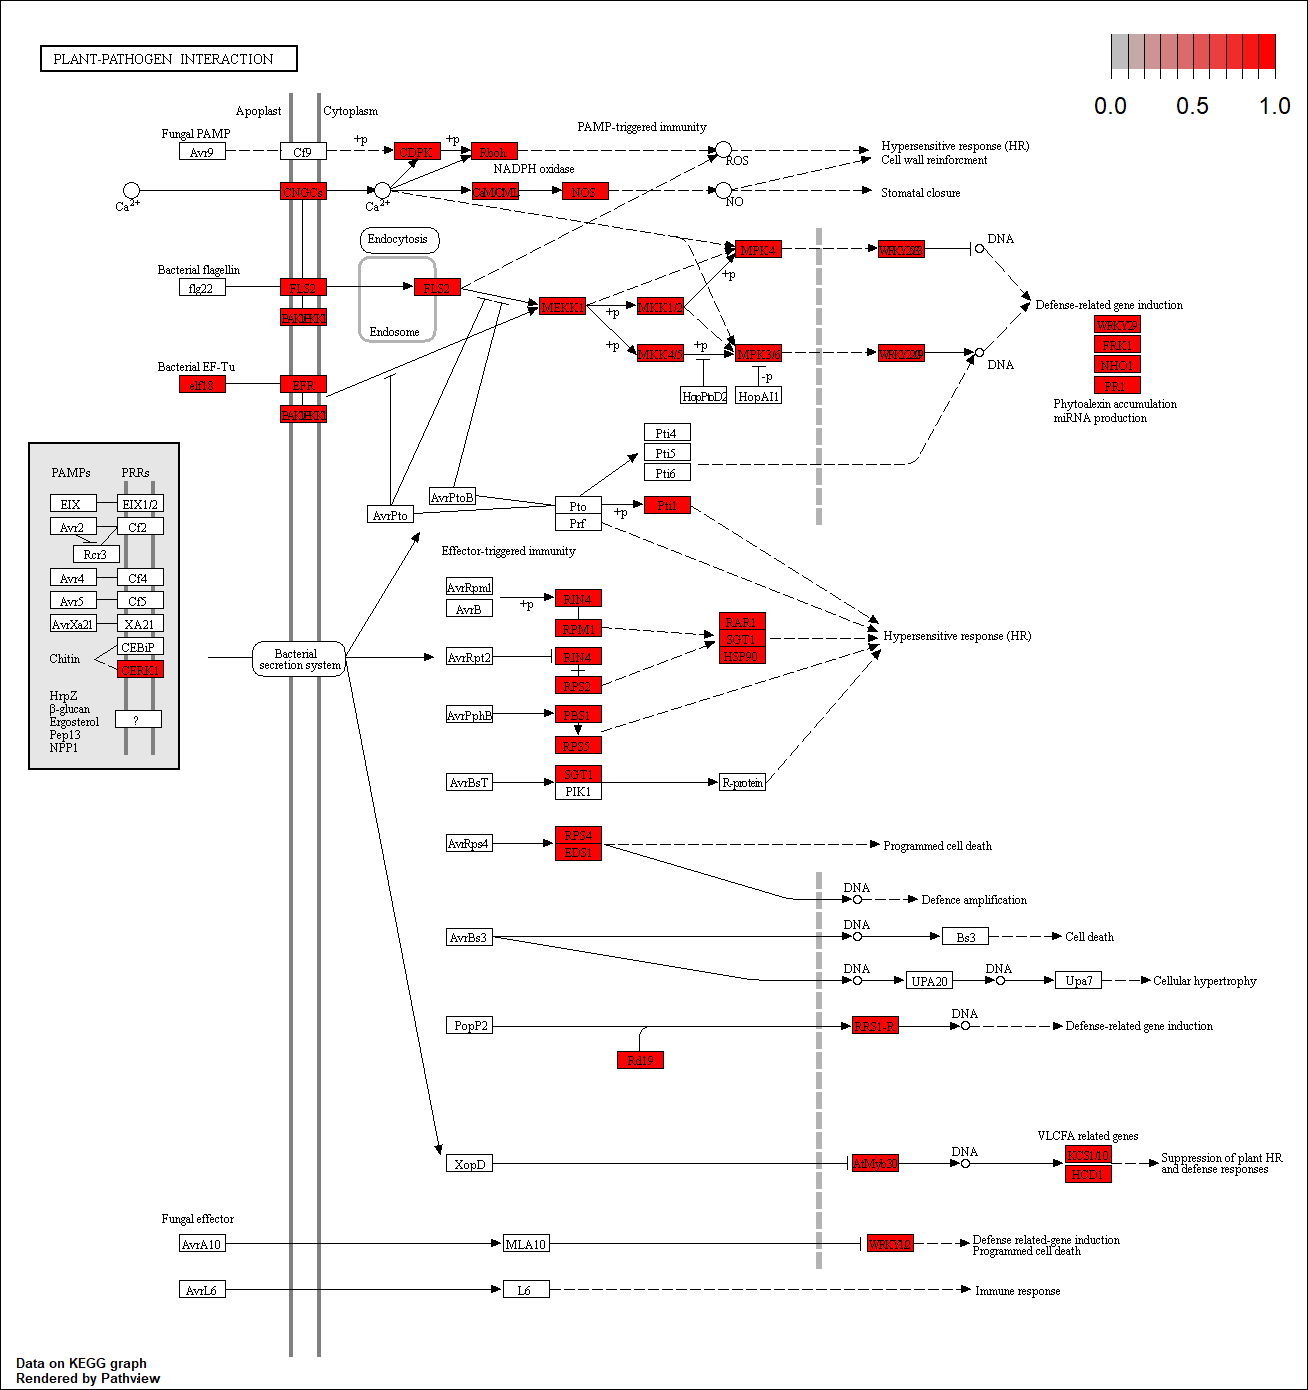

*Figuras 19,20. Mapa metabólico de la interacción de la planta con los patógenos a continuación (segunda imagen), en rojo, aquellas que se expresan más activamente para el caso del ath04626.*

##### Observaciones:
En la figura 19,20 vemos que se expresan genes que codifican o bien para proteínas o complejos enzimáticos, sobre todo implicados en la respuesta a patógenos de índole bacteriana. 